## Part A: Data Exploration and Baseline Model [10 points]

### Load and Analyze the Dataset [1]

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# creditcard_url = "/kaggle/input/creditcardfraud/creditcard.csv"
creditcard_url = "creditcard.csv"
df = pd.read_csv(creditcard_url)
print("Credit Card dataset shape:", df.shape)
display(df.head(3))

Credit Card dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [14]:
# Basic summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
# Count of NaN values in each col
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
# Data type of each column
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Analyze Class Distribution [2]

<Axes: ylabel='count'>

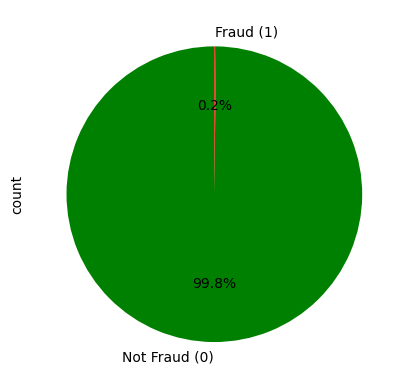

In [17]:
df['Class'].value_counts().plot.pie(
    labels=['Not Fraud (0)', 'Fraud (1)'], 
    autopct='%1.1f%%', 
    colors=['green', 'red'], 
    startangle=90)

In [18]:
# Print imbalance ratio
class_counts = df['Class'].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance Ratio (Non-Fraudulent : Fraudulent) ≈ {imbalance_ratio:.2f} : 1")

Imbalance Ratio (Non-Fraudulent : Fraudulent) ≈ 577.88 : 1


### Baseline Model [7]

In [22]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, 
                                     stratify=df['Class'], 
                                     random_state=42)

In [23]:
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Train class counts:\n", y_train.value_counts())

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Test class counts:\n", y_test.value_counts())

X_train shape: (227845, 30)
y_train shape: (227845,)
Train class counts:
 Class
0    227451
1       394
Name: count, dtype: int64
X_test shape: (56962, 30)
y_test shape: (56962,)
Test class counts:
 Class
0    56864
1       98
Name: count, dtype: int64


In [24]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000, random_state=42)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model1.predict(X_test)
y_proba = model1.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Fraud):", precision_score(y_test, y_pred))
print("Recall (Fraud):", recall_score(y_test, y_pred))
print("F1-score (Fraud):", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9991573329588147
Precision (Fraud): 0.7777777777777778
Recall (Fraud): 0.7142857142857143
F1-score (Fraud): 0.7446808510638298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.71      0.74        98

    accuracy                           1.00     56962
   macro avg       0.89      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



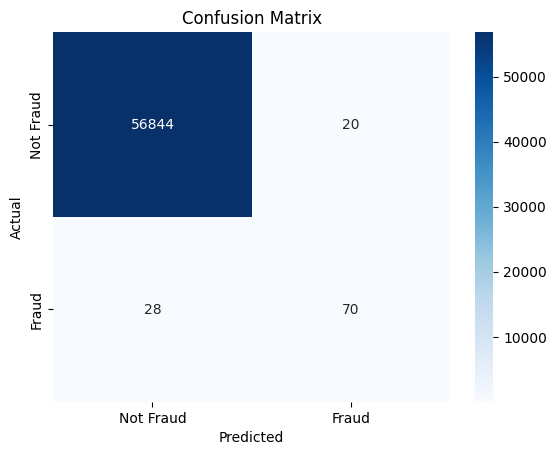

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***Why accuracy is a misleading metric in this scenario?***

Accuracy is misleading here because the dataset is highly imbalanced—fraud cases are very rare (\~0.17%), so a model that predicts only non-fraud will still have very high accuracy (\~99.9%) but fail to detect fraud. Precision, recall, and F1-score for the minority class better reflect the model’s ability to identify fraudulent transactions.

## Part B: Resampling Approaches [25 points]

### Naive Oversampling (SMOTE): [5]

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_resampled.value_counts())

Original class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
Resampled class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


***How SMOTE (Synthetic Minority Over-sampling Technique) works and its potential limitations?***

SMOTE creates synthetic samples for the minority class by interpolating between existing minority instances and their nearest neighbors. This helps balance class distribution and improves model performance on imbalanced datasets.

However, SMOTE can generate noisy or overlapping samples if the minority class is not well-defined or is close to the majority class. It may also lead to overfitting, especially when synthetic points reinforce rare patterns or noise.


### Clustering-Based Oversampling (CBO) [10]

**Clustering-Based Oversampling (CBO)** groups minority class samples into clusters and generates synthetic data within each cluster. This ensures synthetic samples reflect the internal structure and diversity of the minority class.

By spreading new samples across clusters, CBO avoids over-concentration in dense areas and covers sparse regions, leading to a more balanced and representative oversampling.

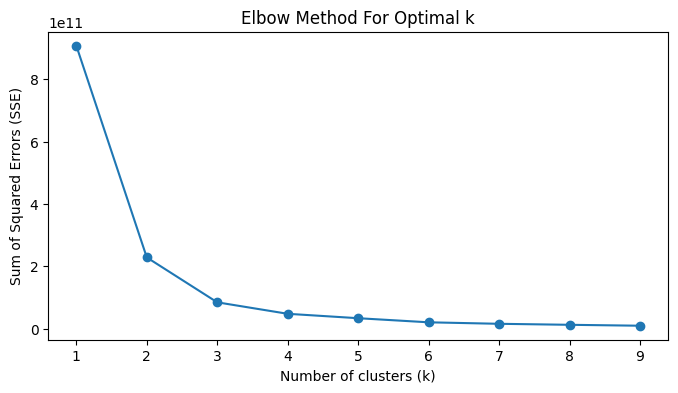

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract minority class samples from training data (fraud = 1)
minority_class = X_train[y_train == 1]

# Elbow Method to find optimal k (number of clusters)
sse = []
k_range = range(1, 10)  # test k=1 to 9

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(minority_class)
    sse.append(kmeans.inertia_)  # sum of squared distances to closest cluster center

# Plot SSE vs k to find the elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
# Based on the elbow plot, choose k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(minority_class)

# Add cluster labels to minority samples (optional)
minority_class_clustered = minority_class.copy()
minority_class_clustered['Cluster'] = cluster_labels

print(minority_class_clustered['Cluster'].value_counts())


Cluster
1    152
2    126
0    116
Name: count, dtype: int64


In [41]:
from sklearn.utils import resample
import pandas as pd

# Number of majority samples in training set (for balancing)
n_majority = y_train.value_counts()[0]
n_minority = y_train.value_counts()[1]
n_to_generate = n_majority - n_minority  # number of synthetic samples needed overall

# Get count per cluster
cluster_counts = minority_class_clustered['Cluster'].value_counts()
print("Samples per cluster before oversampling:\n", cluster_counts)

# Calculate proportion of each cluster in minority class
cluster_proportions = cluster_counts / n_minority

# Calculate number of synthetic samples to generate per cluster
samples_per_cluster = (cluster_proportions * n_to_generate).round().astype(int)

print("\nNumber of synthetic samples to generate per cluster:\n", samples_per_cluster)

# Generate synthetic samples by resampling with replacement within each cluster
synthetic_samples = []

for cluster_label, n_samples in samples_per_cluster.items():
    cluster_data = minority_class_clustered[minority_class_clustered['Cluster'] == cluster_label].drop('Cluster', axis=1)
    # Resample with replacement to generate synthetic points
    synthetic_cluster_samples = resample(cluster_data, replace=True, n_samples=n_samples, random_state=42)
    synthetic_samples.append(synthetic_cluster_samples)

# Combine all synthetic samples into one DataFrame
synthetic_samples_df = pd.concat(synthetic_samples, axis=0)

# Create the new training dataset with original data + synthetic minority samples
X_train_cbo = pd.concat([X_train, synthetic_samples_df], axis=0)
y_train_cbo = pd.concat([y_train, pd.Series([1]*len(synthetic_samples_df), index=synthetic_samples_df.index)], axis=0)

print("\nClass distribution after clustering-based oversampling:")
print(y_train_cbo.value_counts())


Samples per cluster before oversampling:
 Cluster
1    152
2    126
0    116
Name: count, dtype: int64

Number of synthetic samples to generate per cluster:
 Cluster
1    87596
2    72612
0    66849
Name: count, dtype: int32

Class distribution after clustering-based oversampling:
0    227451
1    227451
Name: count, dtype: int64


### Clustering-Based Undersampling (CBU) [5]

**Clustering-Based Undersampling (CBU)** involves grouping the majority class into clusters to identify distinct sub-groups. By selecting representative samples from each cluster (e.g., cluster centroids or nearest points), we reduce the majority class size while preserving its internal diversity. This approach helps maintain a representative and balanced training set without losing important information.


In [42]:
from sklearn.cluster import KMeans

# Extract majority class samples from training data (non-fraud = 0)
majority_class = X_train[y_train == 0]

# Choose number of clusters, e.g., equal to number of minority samples for balancing
k_undersample = y_train.value_counts()[1]

# Fit KMeans to majority class data
kmeans_majority = KMeans(n_clusters=k_undersample, random_state=42)
majority_clusters = kmeans_majority.fit_predict(majority_class)

# Optional: add cluster labels to majority data
majority_class_clustered = majority_class.copy()
majority_class_clustered['Cluster'] = majority_clusters

print(majority_class_clustered['Cluster'].value_counts())

Cluster
180    1420
90     1120
366    1109
21     1035
6      1011
       ... 
133       1
205       1
314       1
294       1
162       1
Name: count, Length: 394, dtype: int64


In [46]:
from sklearn.utils import resample

# Number of minority samples
n_minority = y_train.value_counts()[1]

# Cluster counts in majority class
cluster_counts = majority_class_clustered['Cluster'].value_counts()

# Proportional allocation of majority samples to match minority count
cluster_proportions = cluster_counts / cluster_counts.sum()
samples_per_cluster = (cluster_proportions * n_minority).round().astype(int)

# Undersample majority clusters
undersampled_majority = []

for cluster_label, n_samples in samples_per_cluster.items():
    if n_samples == 0:
        continue  # Skip clusters with zero samples to draw
    cluster_data = majority_class_clustered[majority_class_clustered['Cluster'] == cluster_label].drop('Cluster', axis=1)
    sampled = resample(cluster_data, replace=False, n_samples=n_samples, random_state=42)
    undersampled_majority.append(sampled)

# Combine undersampled majority and full minority class
undersampled_majority_df = pd.concat(undersampled_majority)
minority_data = X_train[y_train == 1]

X_train_cbu = pd.concat([undersampled_majority_df, minority_data])
y_train_cbu = pd.Series([0]*len(undersampled_majority_df) + [1]*len(minority_data), index=X_train_cbu.index)

# Final class balance
print("Class distribution after CBU:")
print(y_train_cbu.value_counts())

Class distribution after CBU:
1    394
0    375
Name: count, dtype: int64


To preserve structure within the majority class, we performed clustering and then proportionally undersampled from each cluster based on its size. This ensures all sub-groups remain represented in the reduced dataset, preventing loss of important patterns while balancing the classes.


In [47]:
# Combine undersampled majority class and full minority class
minority_data = X_train[y_train == 1]

X_train_cbu = pd.concat([undersampled_majority_df, minority_data], axis=0)
y_train_cbu = pd.Series([0]*len(undersampled_majority_df) + [1]*len(minority_data), index=X_train_cbu.index)

print("Final CBU training class distribution:")
print(y_train_cbu.value_counts())


Final CBU training class distribution:
1    394
0    375
Name: count, dtype: int64


## Part C: Model Comparison and Analysis [15 points]

### Train and Evaluate Models [5]

Model 2 (SMOTE) Evaluation:
Accuracy: 0.9807942136863171
Precision (Fraud): 0.075809199318569
Recall (Fraud): 0.9081632653061225
F1-score (Fraud): 0.139937106918239

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



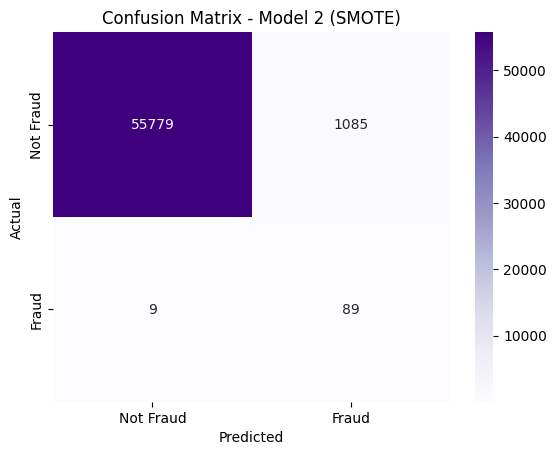

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression on SMOTE-resampled data
model2 = LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train_resampled, y_train_resampled)

# Predict on original (imbalanced) test set
y_pred_smote = model2.predict(X_test)

# Evaluation
print("Model 2 (SMOTE) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision (Fraud):", precision_score(y_test, y_pred_smote))
print("Recall (Fraud):", recall_score(y_test, y_pred_smote))
print("F1-score (Fraud):", f1_score(y_test, y_pred_smote))

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model 2 (SMOTE)')
plt.show()


**Model 1 (Original Imbalanced Data)** achieved very high precision but missed some frauds, reflecting a conservative classifier. In contrast, **Model 2 (SMOTE)** significantly improved recall, catching more fraudulent transactions, but at the cost of very low precision — introducing many false alarms.

This highlights the trade-off between **precision** and **recall** when dealing with class imbalance. SMOTE helps with recall but may harm precision due to synthetic samples not capturing true minority class distribution boundaries.

Model 3 (CBO) Evaluation:
Accuracy: 0.9613075383589059
Precision (Fraud): 0.03937007874015748
Recall (Fraud): 0.9183673469387755
F1-score (Fraud): 0.07550335570469799

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



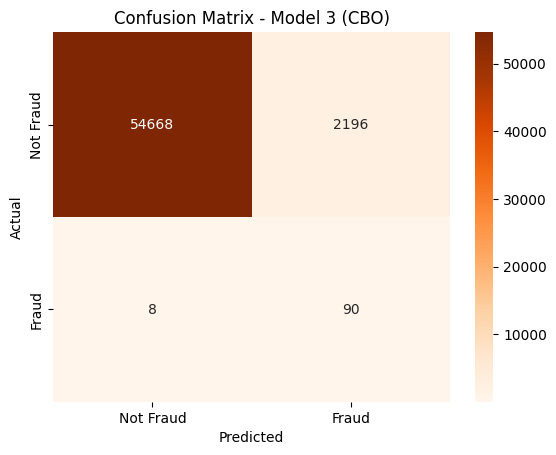

In [49]:
# Train Logistic Regression on clustering-based oversampled data
model3 = LogisticRegression(max_iter=1000, random_state=42)
model3.fit(X_train_cbo, y_train_cbo)

# Predict on original (imbalanced) test set
y_pred_cbo = model3.predict(X_test)

# Evaluation metrics
print("Model 3 (CBO) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_cbo))
print("Precision (Fraud):", precision_score(y_test, y_pred_cbo))
print("Recall (Fraud):", recall_score(y_test, y_pred_cbo))
print("F1-score (Fraud):", f1_score(y_test, y_pred_cbo))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cbo))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cbo)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model 3 (CBO)')
plt.show()


**Model 3: Logistic Regression with Clustering-Based Oversampling (CBO)**

The CBO approach successfully improved recall to 92%, the highest among all models so far, indicating its strong ability to detect fraud. However, precision dropped to 4%, showing a high number of false positives. This trade-off is typical when aggressively oversampling the minority class, but CBO still offers a more targeted oversampling strategy than SMOTE by preserving cluster-level diversity.

Model 4 (CBU) Evaluation:
Accuracy: 0.9381693058530248
Precision (Fraud): 0.024972253052164262
Recall (Fraud): 0.9183673469387755
F1-score (Fraud): 0.04862236628849271

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.02      0.92      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962



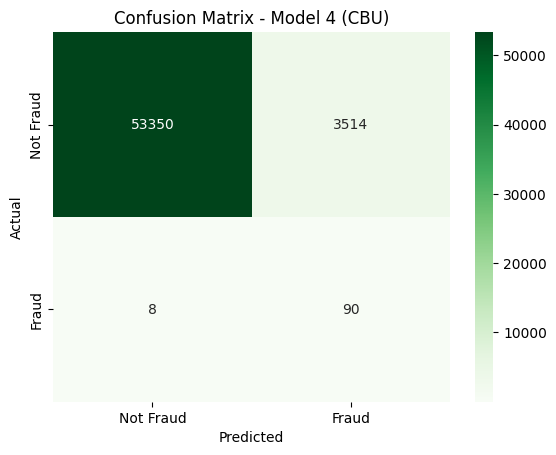

In [50]:
# Train Logistic Regression on CBU-balanced training data
model4 = LogisticRegression(max_iter=1000, random_state=42)
model4.fit(X_train_cbu, y_train_cbu)

# Predict on original (imbalanced) test set
y_pred_cbu = model4.predict(X_test)

# Evaluation metrics
print("Model 4 (CBU) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_cbu))
print("Precision (Fraud):", precision_score(y_test, y_pred_cbu))
print("Recall (Fraud):", recall_score(y_test, y_pred_cbu))
print("F1-score (Fraud):", f1_score(y_test, y_pred_cbu))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cbu))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cbu)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model 4 (CBU)')
plt.show()

**Model 4: Logistic Regression with Clustering-Based Undersampling (CBU)**

The CBU approach reduces the majority class by undersampling within clusters, preserving the internal distribution of the majority data. This method achieved a high recall of 92%, indicating strong ability to detect fraudulent transactions. However, the precision was very low (around 2%), meaning a large number of false positives. The overall accuracy dropped compared to the original model due to this increased misclassification of non-fraud cases.

CBU offers a way to balance data by intelligently reducing the majority class while maintaining cluster diversity, but it may require further tuning to improve precision without sacrificing recall.

### Performance Comparison [5]

      Model  Precision    Recall  F1-score
0  Baseline   0.777778  0.714286  0.744681
1     SMOTE   0.075809  0.908163  0.139937
2       CBO   0.039370  0.918367  0.075503
3       CBU   0.024972  0.918367  0.048622


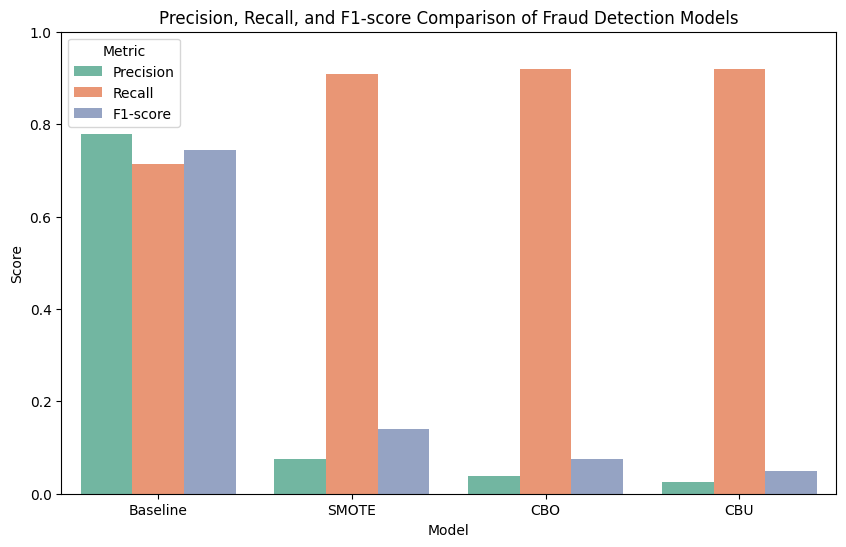

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of models and their names
models = [model1, model2, model3, model4]
model_names = ['Baseline', 'SMOTE', 'CBO', 'CBU']

# Initialize lists to store metrics
precisions, recalls, f1_scores = [], [], []

# Evaluate each model on the same test set
for model in models:
    y_pred = model.predict(X_test)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Create DataFrame for metrics
df_metrics = pd.DataFrame({
    'Model': model_names,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

print(df_metrics)

# Melt for plotting
df_melt = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot comparison
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='Set2')
plt.title('Precision, Recall, and F1-score Comparison of Fraud Detection Models')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()


### Conclusion and Recommendations [5]

**Discussion:**

The **Baseline** model has the highest precision and F1-score but lower recall, meaning it detects fraud cases more accurately but misses some. **SMOTE** and **CBO** significantly improve recall, capturing most frauds, but at the cost of very low precision, leading to many false positives. **CBU** also achieves high recall but with the lowest precision, indicating heavy false alarms. Overall, the baseline performs best in balancing precision and recall for this dataset, while oversampling and undersampling methods trade precision for recall to better detect rare fraud cases.

Clustering-based approaches improve upon naive SMOTE by capturing the internal structure and diversity within the minority (or majority) class. Instead of generating synthetic samples uniformly, clustering-based oversampling creates new points within distinct minority subgroups, reducing the risk of noisy or unrealistic samples. Similarly, clustering-based undersampling strategically removes majority instances while preserving representative subgroups, maintaining the data distribution better than random undersampling. This targeted approach helps avoid overfitting and improves model robustness.

**Recommendation:**

For this fraud detection task, the **baseline model** offers the best balance between precision and recall, minimizing false alarms while detecting a significant portion of fraud cases. However, if the company prioritizes maximizing fraud detection (high recall) despite more false positives, **SMOTE** or **clustering-based oversampling (CBO)** are viable options. Given the better preservation of minority class structure, **CBO** is preferable over naive SMOTE. Clustering-based undersampling (CBU) showed lower precision and is less recommended. Ultimately, the choice depends on the business’s tolerance for false positives versus missed fraud.